In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("df_train.csv")
years = [i for i in range(1990, 2014)]
# encode CHGOFF (defuault) as 1 and PIF as 0
df['Default'] = df['LoanStatus'].apply(lambda x: 1 if x == "CHGOFF" else 0)

<ipython-input-2-1723771ca7fd>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_train.csv")


<ipython-input-3-eb65ae94dbd1>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, j in df.groupby(['BusinessType']):
<ipython-input-3-eb65ae94dbd1>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-3-eb65ae94dbd1>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-3-eb65ae94dbd1>:4:

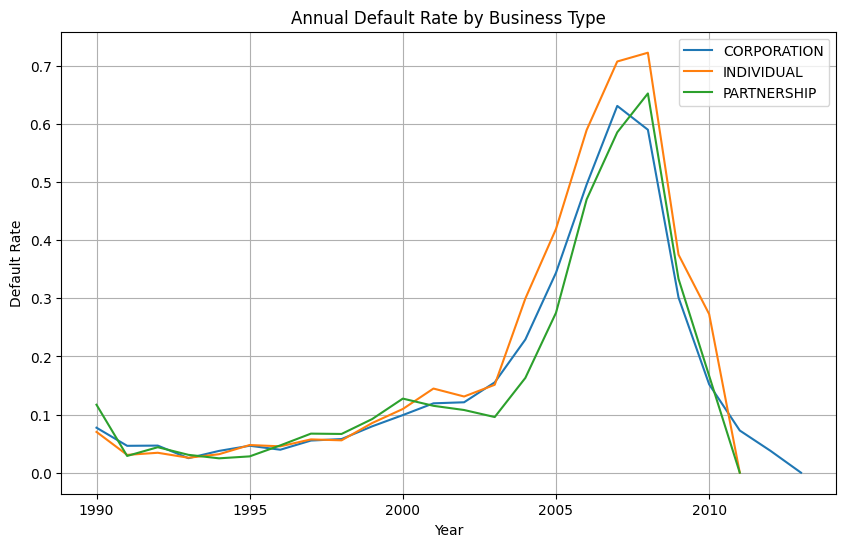

In [3]:
plt.figure(figsize=(10,6))
for i, j in df.groupby(['BusinessType']):
  if str(i) != "MISSING":
    temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
    plt.plot(temp['ApprovalFiscalYear'], temp['Default'], label = str(i))
plt.grid()
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.title("Annual Default Rate by Business Type")
plt.legend()
plt.show()

<ipython-input-4-4bb5583f6d8b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_100k = df.loc[df['GrossApproval'] <= 100000].groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-4-4bb5583f6d8b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_100_300k = df.loc[(df['GrossApproval'] > 100000) & (df['GrossApproval'] <= 300000)].groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-4-4bb5583f6d8b>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or se

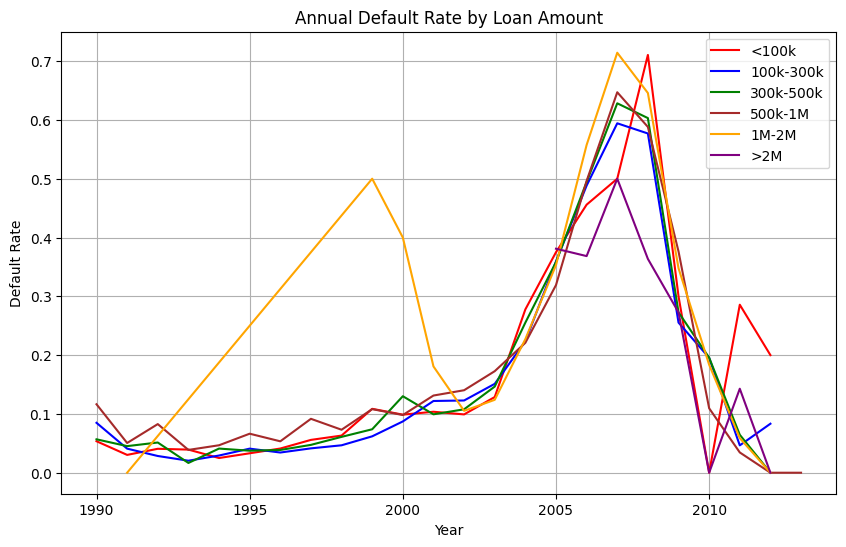

In [4]:
# plot annual default rate by loan amount
df_100k = df.loc[df['GrossApproval'] <= 100000].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_100_300k = df.loc[(df['GrossApproval'] > 100000) & (df['GrossApproval'] <= 300000)].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_300_500k = df.loc[(df['GrossApproval'] > 300000) & (df['GrossApproval'] <= 500000)].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_500_1M = df.loc[(df['GrossApproval'] > 500000) & (df['GrossApproval'] <= 1000000)].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_1M_2M = df.loc[(df['GrossApproval'] > 1000000) & (df['GrossApproval'] <= 2000000)].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_2M = df.loc[df['GrossApproval'] > 2000000].groupby(['ApprovalFiscalYear']).mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(df_100k['ApprovalFiscalYear'], df_100k['Default'], label = "<100k", color = 'red')
plt.plot(df_100_300k['ApprovalFiscalYear'], df_100_300k['Default'], label = "100k-300k", color = 'blue')
plt.plot(df_300_500k['ApprovalFiscalYear'], df_300_500k['Default'], label = "300k-500k", color = 'green')
plt.plot(df_500_1M['ApprovalFiscalYear'], df_500_1M['Default'], label = "500k-1M", color = 'brown')
plt.plot(df_1M_2M['ApprovalFiscalYear'], df_1M_2M['Default'], label = "1M-2M", color = 'orange')
plt.plot(df_2M['ApprovalFiscalYear'], df_2M['Default'], label = ">2M", color = 'purple')
plt.grid()
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.title("Annual Default Rate by Loan Amount")
plt.legend()
plt.show()

<ipython-input-5-8962ae76bc2f>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, j in df.groupby(['subpgmdesc']):
<ipython-input-5-8962ae76bc2f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-5-8962ae76bc2f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-5-8962ae76bc2f>:3: F

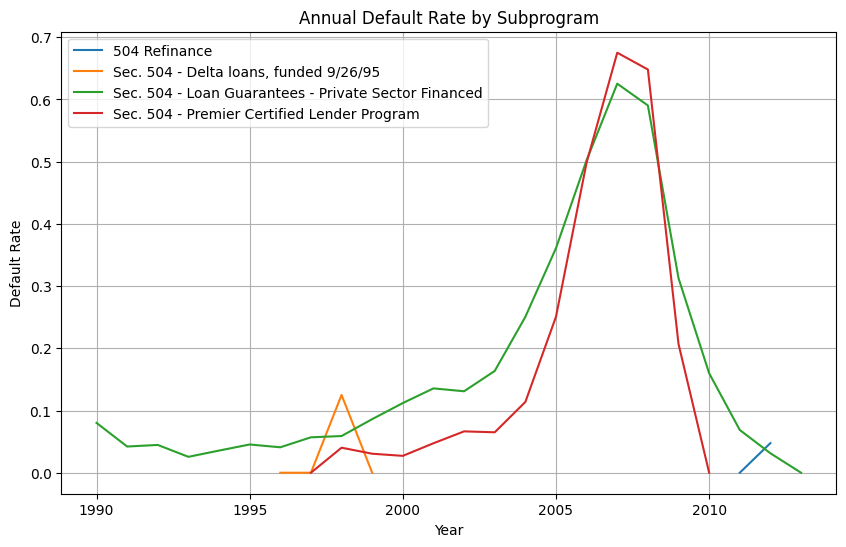

In [5]:
plt.figure(figsize=(10,6))
for i, j in df.groupby(['subpgmdesc']):
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
  plt.plot(temp['ApprovalFiscalYear'], temp['Default'], label = str(i))
plt.grid()
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.title("Annual Default Rate by Subprogram")
plt.legend()
plt.show()

<ipython-input-6-f93188ebde4b>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, j in df.groupby(['DeliveryMethod']):
<ipython-input-6-f93188ebde4b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-6-f93188ebde4b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-6-f93188ebde4b>:

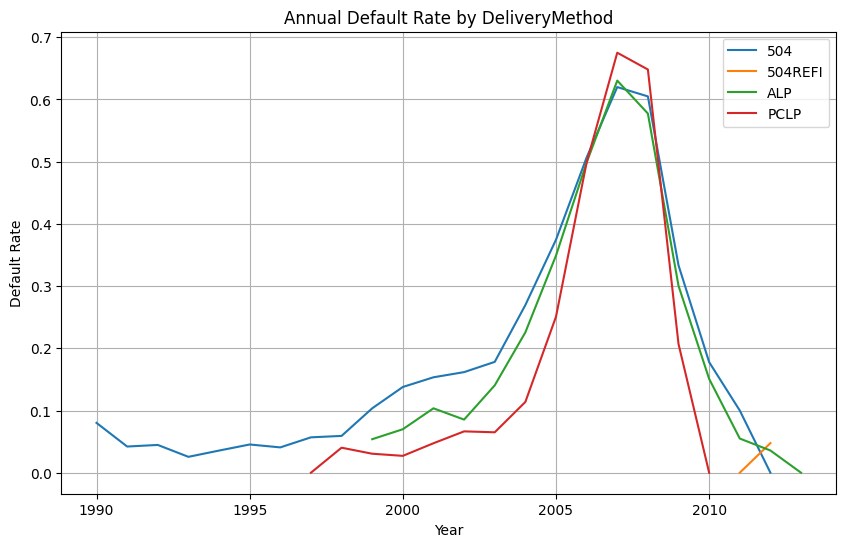

In [6]:
plt.figure(figsize=(10,6))
for i, j in df.groupby(['DeliveryMethod']):
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
  plt.plot(temp['ApprovalFiscalYear'], temp['Default'], label = str(i))
plt.grid()
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.title("Annual Default Rate by DeliveryMethod")
plt.legend()
plt.show()

<ipython-input-7-6db3f0c2a877>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, j in df.groupby(['NaicsCode']):
<ipython-input-7-6db3f0c2a877>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-7-6db3f0c2a877>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-7-6db3f0c2a877>:3: Fu

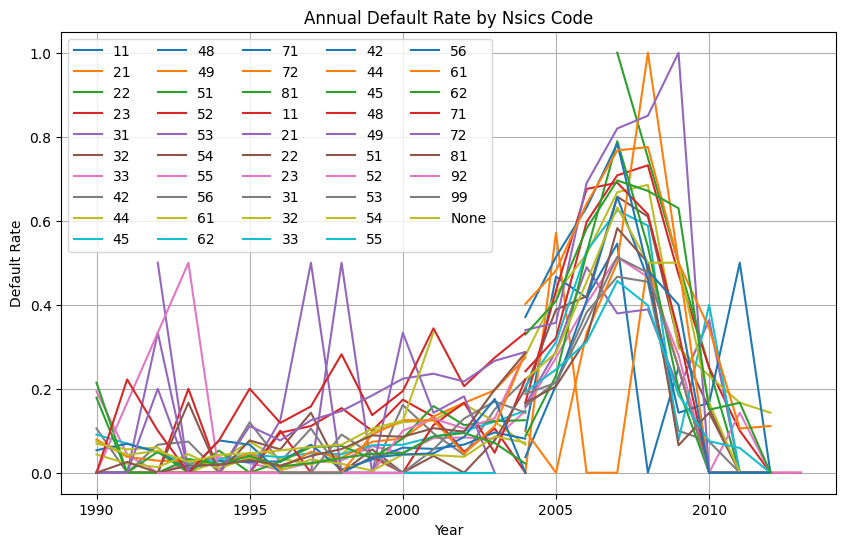

In [7]:
plt.figure(figsize=(10,6))
for i, j in df.groupby(['NaicsCode']):
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
  plt.plot(temp['ApprovalFiscalYear'], temp['Default'], label = str(i))
plt.grid()
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.title("Annual Default Rate by Nsics Code")
plt.legend(loc='upper left',ncol=5)
plt.show()

<ipython-input-8-2722fa86c01f>:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, j in df.groupby(['Is ThirdParty']):
<ipython-input-8-2722fa86c01f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-8-2722fa86c01f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()


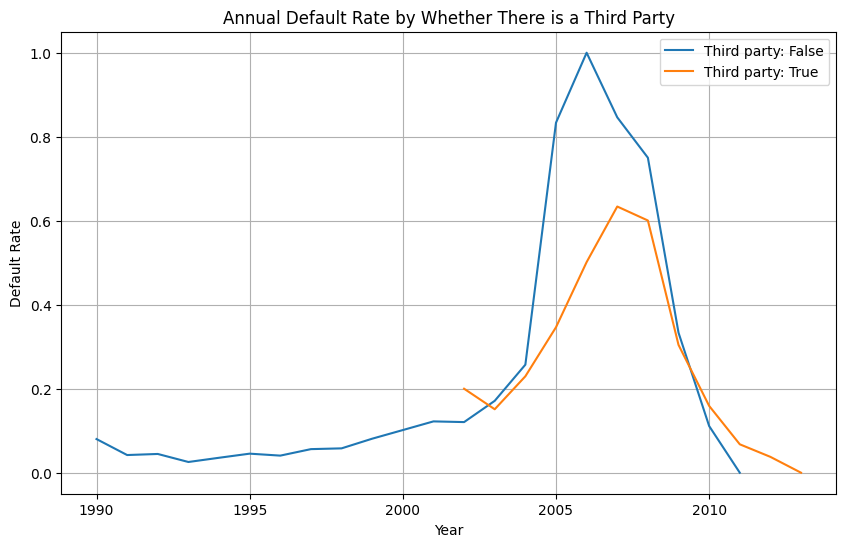

In [8]:
plt.figure(figsize=(10,6))
for i, j in df.groupby(['Is ThirdParty']):
  temp = j.groupby(['ApprovalFiscalYear']).mean().reset_index()
  plt.plot(temp['ApprovalFiscalYear'], temp['Default'], label = "Third party: " + str(bool(int(i))))
plt.grid()
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.title("Annual Default Rate by Whether There is a Third Party")
plt.legend()
plt.show()

<ipython-input-9-c3fdfa70d361>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_60 = df.loc[df['TermInMonths'] <= 60].groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-9-c3fdfa70d361>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_120 = df.loc[(df['TermInMonths'] > 60) & (df['TermInMonths'] <= 120)].groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-9-c3fdfa70d361>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns whi

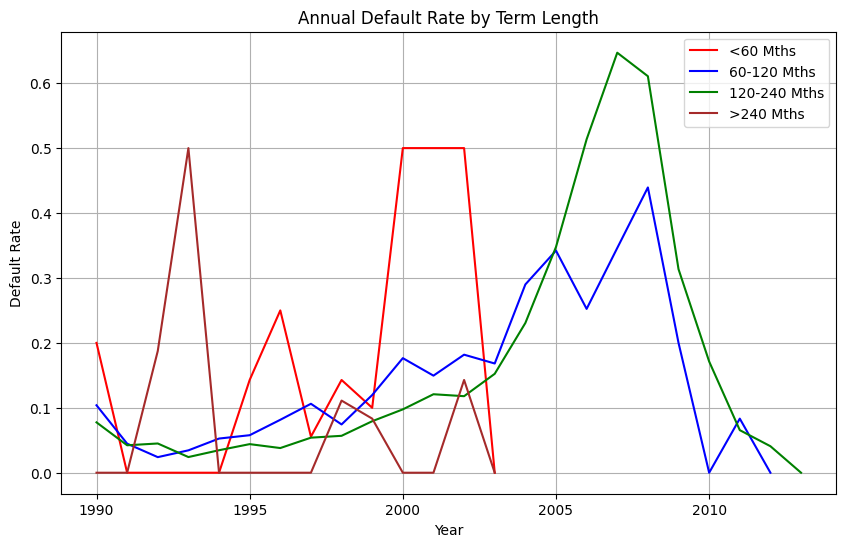

In [9]:
df_60 = df.loc[df['TermInMonths'] <= 60].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_120 = df.loc[(df['TermInMonths'] > 60) & (df['TermInMonths'] <= 120)].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_240 = df.loc[(df['TermInMonths'] > 120) & (df['TermInMonths'] <= 240)].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_ab240 = df.loc[df['TermInMonths'] > 240].groupby(['ApprovalFiscalYear']).mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(df_60['ApprovalFiscalYear'], df_60['Default'], label = "<60 Mths", color = 'red')
plt.plot(df_120['ApprovalFiscalYear'], df_120['Default'], label = "60-120 Mths", color = 'blue')
plt.plot(df_240['ApprovalFiscalYear'], df_240['Default'], label = "120-240 Mths", color = 'green')
plt.plot(df_ab240['ApprovalFiscalYear'], df_ab240['Default'], label = ">240 Mths", color = 'brown')
plt.grid()
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.title("Annual Default Rate by Term Length")
plt.legend()
plt.show()

<ipython-input-17-114ae25f875b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_BorrUnemp4_5 = df.loc[df['BorrState Unemployment'] <= 4.5].groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-17-114ae25f875b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_BorrUnemp6 = df.loc[(df['BorrState Unemployment'] > 4.5) & (df['BorrState Unemployment'] <= 6)].groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-17-114ae25f875b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Eith

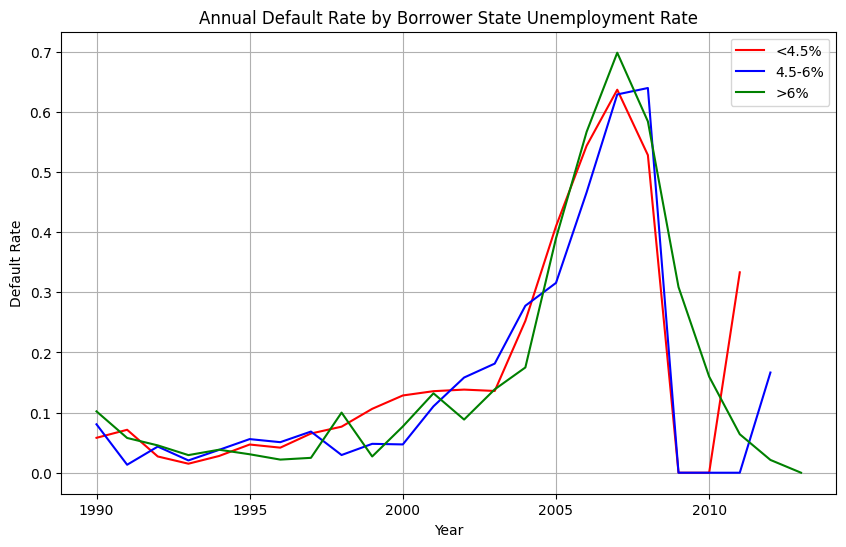

In [17]:
df_BorrUnemp4_5 = df.loc[df['BorrState Unemployment'] <= 4.5].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_BorrUnemp6 = df.loc[(df['BorrState Unemployment'] > 4.5) & (df['BorrState Unemployment'] <= 6)].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_BorrUnempAbv6 = df.loc[df['BorrState Unemployment'] > 6].groupby(['ApprovalFiscalYear']).mean().reset_index()
plt.figure(figsize=(10,6))
plt.plot(df_BorrUnemp4_5['ApprovalFiscalYear'], df_BorrUnemp4_5['Default'], label = "<4.5%", color = 'red')
plt.plot(df_BorrUnemp6['ApprovalFiscalYear'], df_BorrUnemp6['Default'], label = "4.5-6%", color = 'blue')
plt.plot(df_BorrUnempAbv6['ApprovalFiscalYear'], df_BorrUnempAbv6['Default'], label = ">6%", color = 'green')

plt.grid()
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.title("Annual Default Rate by Borrower State Unemployment Rate")
plt.legend()
plt.show()

<ipython-input-18-99c5d6e5c1a2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ProjUnemp4_5 = df.loc[df['ProjectState Unemployment'] <= 4.5].groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-18-99c5d6e5c1a2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ProjUnemp6 = df.loc[(df['ProjectState Unemployment'] > 4.5) & (df['BorrState Unemployment'] <= 6)].groupby(['ApprovalFiscalYear']).mean().reset_index()
<ipython-input-18-99c5d6e5c1a2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False

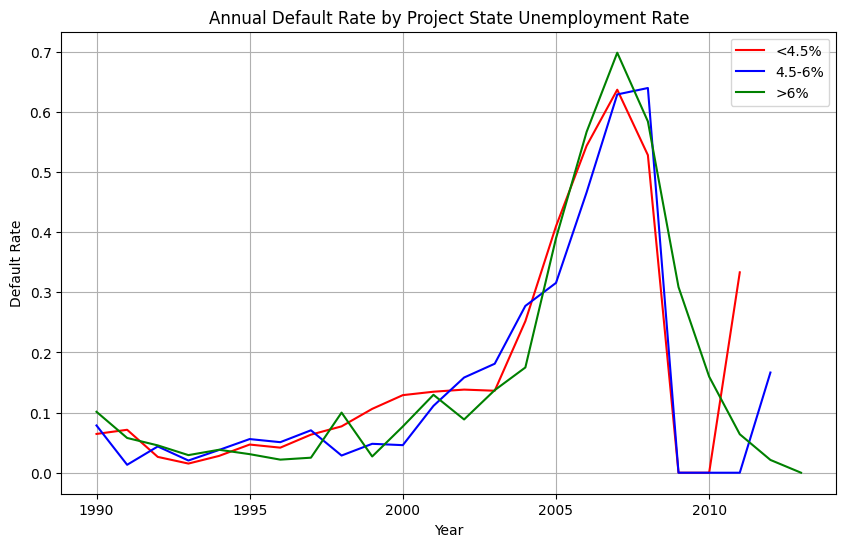

In [18]:
df_ProjUnemp4_5 = df.loc[df['ProjectState Unemployment'] <= 4.5].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_ProjUnemp6 = df.loc[(df['ProjectState Unemployment'] > 4.5) & (df['BorrState Unemployment'] <= 6)].groupby(['ApprovalFiscalYear']).mean().reset_index()
df_ProjUnempAbv6 = df.loc[df['ProjectState Unemployment'] > 6].groupby(['ApprovalFiscalYear']).mean().reset_index()
plt.figure(figsize=(10,6))
plt.plot(df_ProjUnemp4_5['ApprovalFiscalYear'], df_ProjUnemp4_5['Default'], label = "<4.5%", color = 'red')
plt.plot(df_ProjUnemp6['ApprovalFiscalYear'], df_ProjUnemp6['Default'], label = "4.5-6%", color = 'blue')
plt.plot(df_ProjUnempAbv6['ApprovalFiscalYear'], df_ProjUnempAbv6['Default'], label = ">6%", color = 'green')

plt.grid()
plt.xlabel("Year")
plt.ylabel("Default Rate")
plt.title("Annual Default Rate by Project State Unemployment Rate")
plt.legend()
plt.show()

<ipython-input-10-52e838b10447>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gb = df.groupby(['ApprovalFiscalYear']).mean().reset_index()


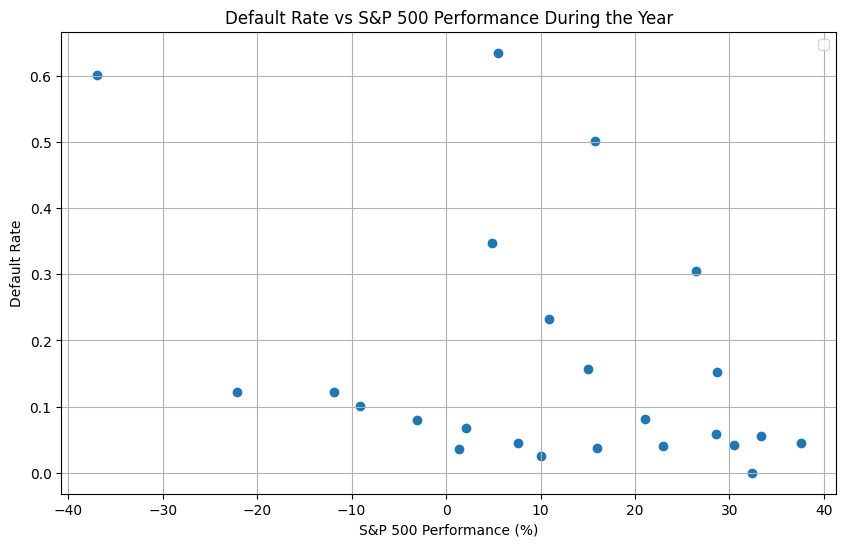

In [10]:
# Default Rate vs S&P 500 Performance
df_gb = df.groupby(['ApprovalFiscalYear']).mean().reset_index()
plt.figure(figsize=(10,6))
plt.scatter(df_gb['SP500 YR'],df_gb['Default'])
plt.grid()
plt.xlabel("S&P 500 Performance (%)")
plt.ylabel("Default Rate")
plt.title("Default Rate vs S&P 500 Performance During the Year")
plt.legend()
plt.show()

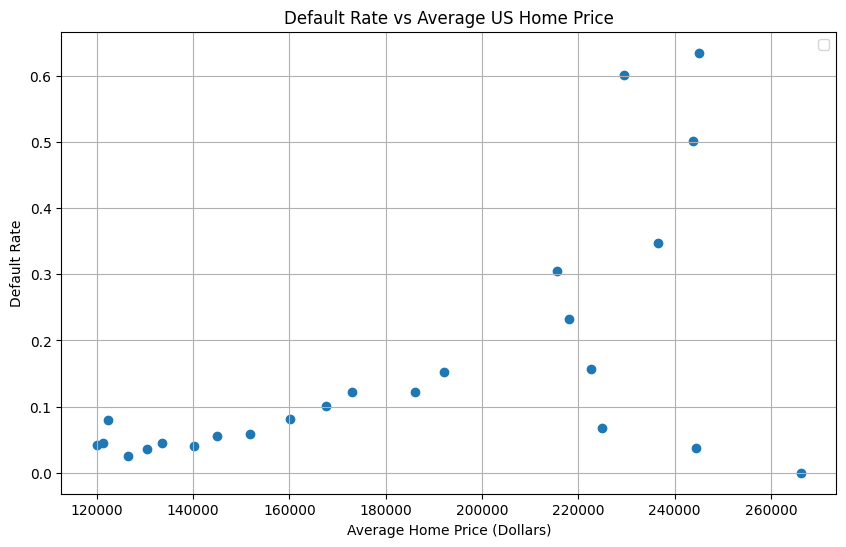

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(df_gb['Avg Home Price'],df_gb['Default'])
plt.grid()
plt.xlabel("Average Home Price (Dollars)")
plt.ylabel("Default Rate")
plt.title("Default Rate vs Average US Home Price")
plt.legend()
plt.show()